# Final Exam
> PHZ4710 - Introduction to Biological Physics, University of Florida, Spring 2023

## Epidemic Modeling

In this final exam, you are going to learn about classic models of epidemic, apply these models to the case of COVID-19, use the methods we have learned in class to solve these models, and present your results as a scientific-paper-style short report. **You must work by yourself.** The report should be 3-4 pages, 11pt font, single spacing, 1in margin. It should include an introduction, several sections on models and results, and a conclusion, plus references. Describe your models in equations, and show your results in figures. You can use your favorite text editor (not jupyter notebook) and convert to PDF for upload. Do NOT include source codes in the report. Instead, upload a separate file (a jupyter notebook, plus its PDF version) that contains the codes used to generate your results.

The main reference for the project is the recent [paper by C M Simon (2020)](https://peerj.com/articles/pchem-14/). Given what we have learned, you should not have problem understanding the basic ideas of the paper. You are also allowed to search for your own references, then cite them in your report.

**1**. Read the paper and learn about the basic SIR model. Describe the model in your report. Apply this model to the case of COVID-19 by looking up relevant parameter values. Solve the model using both rate equations and stochastic simulation (you may use the python classes we used for homework). You should be able to get results similar to Figures 2 and 6B in the paper. Show your results in the report and describe them.

**2**. Generalize the SIR model by incorporating new aspects relevant to COVID-19. (Two years ago, we considered the effect of masking and vaccination. Last year, we considered the rise of variants.) This year, we will consider the loss of immunity and the effect of vaccine boosters. Think about how the SIR model can be modified to incorporate these new processes. (If you have questions on how to implement them, come to my office hour.)

We will consider two modified models. In the first one, incorporate only the loss of immunity into SIR. Look up the rate of immunity loss, then solve the modified model using the same methods as in part 1. Then, in the second model, also include vaccination. In both models, we are interested in the equilibrium number of infected individuals. If this number is nonzero, which means there is always a proportion of people that are sick at any given time, then there is a chance that variants can arise among them and lead to a new wave of infection. Show that this can be prevented by vaccine boosters, i.e., if the vaccination rate (the rate constant of the process, not the current percentage of vaccinated people as usually meant by this term) is sufficiently high, then the infected fraction will go to zero. Besides numerical solutions, try solving for the equilibrium values analytically to find the threshold for the vaccination rate. By your calculation, how often should we get boosters? Present your results in the report -- explain your models, show equations and figures, and interpret your results.

**3**. Discuss your results and draw conclusions. Did the modeling help you understand the dynamics of the pandemic? How can the model be improved? What else would you like to learn from a more sophisticated model?

**4**. Read and revise your report as necessary. The introduction should describe the question that you plan to address in the report (e.g. the factors you choose to study in part 2). The modeling and results parts should provide sufficient evidence for answering the question. The conclusion should provide a clear answer and discuss potential issues or extensions. Use simple, clear, and precise language; proofread to avoid spelling and grammatical mistakes (they will count).

\begin{align}
S + I \xrightarrow{\beta} 2I \\
I \xrightarrow{\gamma} R 
\end{align}

Columns = S,I,R

Rows = Reactions $\beta$,$\gamma$

\begin{equation}
\mathbf{R} = \left( \begin{array}{ccc}
1 & 1 & 0 \\
0 & 1 & 0  
\end{array} \right) \,,
\qquad
\mathbf{P} = \left( \begin{array}{ccc}
0 & 2 & 0 \\
0 & 0 & 1
\end{array} \right)
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Gillespie import StochSimulation

In [111]:
class CovidStochastic(StochSimulation):
    """
    define a derived class to model the folding and unfolding of proteins.
    """
    
    def __init__(self, rates, init, record=True):    # decorate base method
        """
        modify the initialization to specify the stoichiometry matrices.
        the chemical species are U and F in that order; the reactions are U -> F and F -> U.
        """
        reactants = [[1, 1, 0],
                     [0, 1, 0]]
        products = [[0, 2, 0],
                    [0, 0, 1]]
                    
        StochSimulation.__init__(self, (reactants, products), rates, init, record=record)

\begin{equation}
\frac{dS}{dt} = -{\beta}SI
\end{equation}

\begin{equation}
\frac{dI}{dt} = {\beta}SI - {\gamma}I
\end{equation}

\begin{equation}
\frac{dR}{dt} = {\gamma}I
\end{equation}

In [291]:
import scipy.integrate as intgr

EDIT SIMULATIONS

In [524]:
beta = .023
gamma = .54

NS0 = 48
NI0 = 2
NR0 = 0
N = 50

T = 25

In [527]:
cv1 = CovidStochastic([beta,gamma], [NS0,NI0,NR0], record=True)
cv1.run(T)

reactions terminated.


In [512]:
time_points = np.linspace(0,T,101)
x0 = [NS0,NI0,NR0]
sol = intgr.odeint(dNdt, x0, time_points)

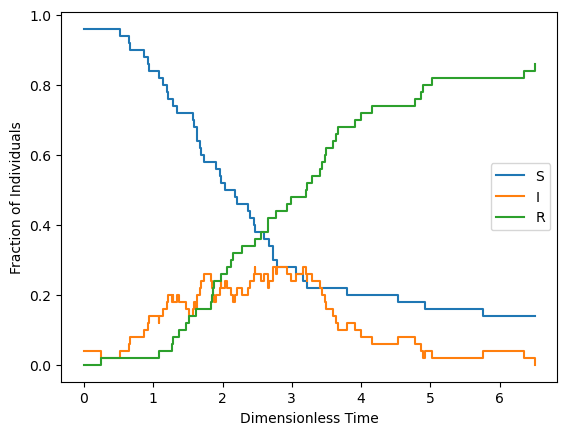

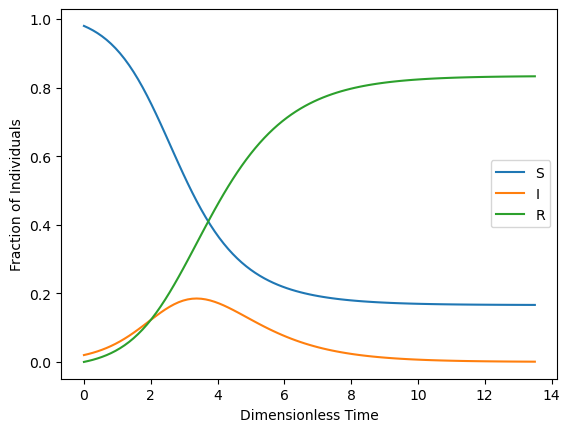

In [528]:
time_hist = np.asarray(cv1.time_hist)
num_hist = np.asarray(cv1.numbers_hist)

plt.plot(time_hist*gamma,num_hist[:,0]/N, drawstyle='steps-post', label = 'S')
plt.plot(time_hist*gamma,num_hist[:,1]/N, drawstyle='steps-post', label = 'I')
plt.plot(time_hist*gamma,num_hist[:,2]/N, drawstyle='steps-post', label = 'R')
plt.ylabel('Fraction of Individuals')
plt.xlabel('Dimensionless Time')
plt.legend()
plt.show()

plt.plot(time_points*gamma, sol[:,0]/N, label = 'S')
plt.plot(time_points*gamma, sol[:,1]/N, label = 'I')
plt.plot(time_points*gamma, sol[:,2]/N, label = 'R')
plt.ylabel('Fraction of Individuals')
plt.xlabel('Dimensionless Time')
plt.legend()
plt.show()

In [935]:
N = 200
def dCapdt(x, t):
    """
    calculate the time derivatives of the numbers of unfolded and folded proteins.
    inputs:
    x: 1-d array, numbers of unfolded and folded proteins, [N_U, N_F].
    t: float, time (in case the equations depend on time explicitly, not used here).
    outputs:
    dxdt: 1-d array, time derivatives, [dN_U/dt, dN_F/dt]
    """
    NS, NI, NR = x    # parse the vector x into components NF, NU
    dSdt = -beta*NS*NI/N  
    dIdt = beta*NS*NI/N - gamma*NI
    dRdt = gamma*NI
    dxdt = [dSdt, dIdt, dRdt]    # combine derivatives into a vector
    return dxdt

In [936]:
beta = 0.3 #Beta times pop#
gamma = 0.1

NS0 = 199
NI0 = 1
NR0 = 0

T = 100

In [937]:
time_points = np.linspace(0,T,101)
x0 = [NS0,NI0,NR0]
sol = intgr.odeint(dCapdt, x0, time_points)

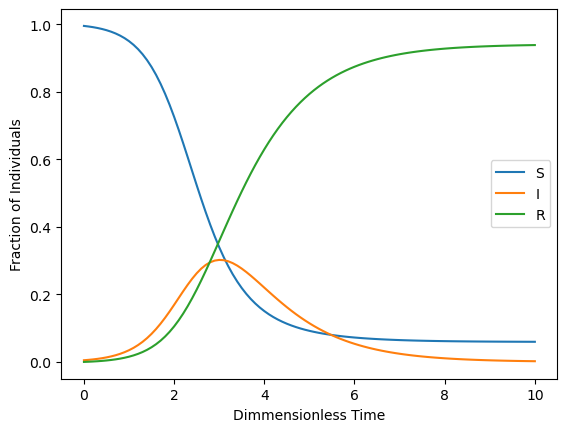

In [938]:
plt.plot(time_points*gamma, sol[:,0]/N, label = 'S')
plt.plot(time_points*gamma, sol[:,1]/N, label = 'I')
plt.plot(time_points*gamma, sol[:,2]/N, label = 'R')
plt.ylabel('Fraction of Individuals')
plt.xlabel('Dimmensionless Time')
plt.legend()
plt.show()

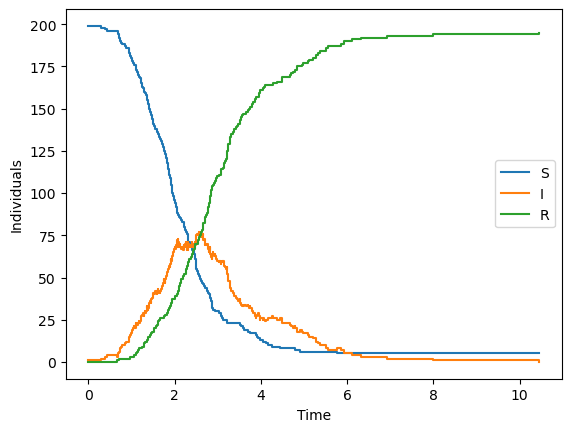

In [949]:
beta1 = 0.0015
gamma1 = 0.1

NS0_1 = 199
NI0_1 = 1
NR0_1 = 0

T1 = 100

cv2 = CovidStochastic([beta1,gamma1], [NS0_1,NI0_1,NR0_1], record=True)
cv2.run(T1)

time_hist1 = np.asarray(cv2.time_hist)
num_hist1 = np.asarray(cv2.numbers_hist)

plt.plot(time_hist1*gamma1,num_hist1[:,0], drawstyle='steps-post', label = 'S')
plt.plot(time_hist1*gamma1,num_hist1[:,1], drawstyle='steps-post', label = 'I')
plt.plot(time_hist1*gamma1,num_hist1[:,2], drawstyle='steps-post', label = 'R')
plt.ylabel('Individuals')
plt.xlabel('Time')
plt.legend()
plt.show()

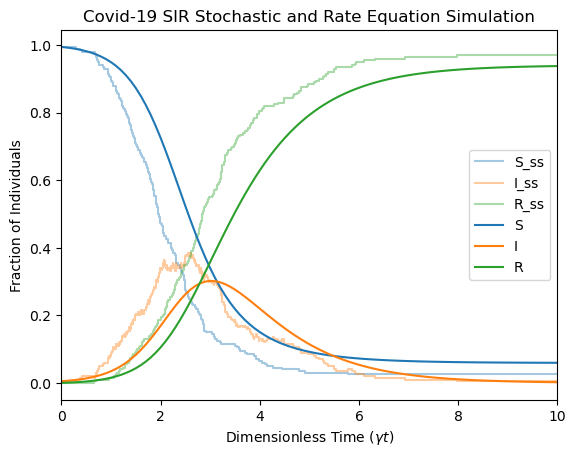

In [950]:
plt.plot(time_hist1*gamma1,num_hist1[:,0]/N, drawstyle='steps-post', alpha = 0.4, label = 'S_ss')
plt.plot(time_hist1*gamma1,num_hist1[:,1]/N, drawstyle='steps-post', alpha = 0.4, label = 'I_ss')
plt.plot(time_hist1*gamma1,num_hist1[:,2]/N, drawstyle='steps-post', alpha = 0.4, label = 'R_ss')
plt.plot(time_points*gamma, sol[:,0]/N, color = '#1f77b4', label = 'S')
plt.plot(time_points*gamma, sol[:,1]/N, color = '#ff7f0e', label = 'I')
plt.plot(time_points*gamma, sol[:,2]/N, color = '#2ca02c', label = 'R')
plt.title('Covid-19 SIR Stochastic and Rate Equation Simulation')
plt.ylabel('Fraction of Individuals')
plt.xlabel('Dimensionless Time ($\gamma{t}$)')
plt.xlim(0,10)
plt.legend()
plt.show()

IMMUNITY LOSS

\begin{equation}
\frac{dS}{dt} = {\lambda}R -{\frac{\beta}{N}}SI
\end{equation}

\begin{equation}
\frac{dI}{dt} = {\frac{\beta}{N}}SI - {\gamma}I
\end{equation}

\begin{equation}
\frac{dR}{dt} = {\gamma}I - {\lambda}R
\end{equation}

In [929]:
def dImdt(x, t):
    """
    calculate the time derivatives of the numbers of unfolded and folded proteins.
    inputs:
    x: 1-d array, numbers of unfolded and folded proteins, [N_U, N_F].
    t: float, time (in case the equations depend on time explicitly, not used here).
    outputs:
    dxdt: 1-d array, time derivatives, [dN_U/dt, dN_F/dt]
    """
    NS, NI, NR = x    # parse the vector x into components NF, NU
    dSdt = lam*NR - beta*NS*NI/N  
    dIdt = beta*NS*NI/N - gamma*NI
    dRdt = gamma*NI - lam*NR
    dxdt = [dSdt, dIdt, dRdt]    # combine derivatives into a vector
    return dxdt

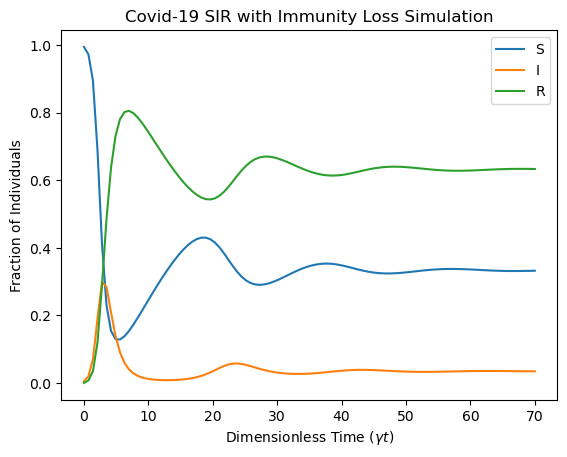

0.034290710789099996


In [953]:
N = 200

beta = 0.3 #Beta times pop#
gamma = 0.1
lam = 1/183

NS0 = 199
NI0 = 1
NR0 = 0

T = 700

time_points = np.linspace(0,T,101)
x0 = [NS0,NI0,NR0]
sol = intgr.odeint(dImdt, x0, time_points)

plt.plot(time_points*gamma, sol[:,0]/N, label = 'S')
plt.plot(time_points*gamma, sol[:,1]/N, label = 'I')
plt.plot(time_points*gamma, sol[:,2]/N, label = 'R')
plt.title('Covid-19 SIR with Immunity Loss Simulation')
plt.ylabel('Fraction of Individuals')
plt.xlabel('Dimensionless Time ($\gamma{t}$)')
plt.legend()
plt.savefig('Covid19_LossImmunity_RE.png')
plt.show()

print(sol[100,1]/N)

IMMUNITY LOSS AND VACCINATION

\begin{equation}
\frac{dS}{dt} = {\lambda}R -{\frac{\beta}{N}}SI - {\nu}S
\end{equation}

\begin{equation}
\frac{dI}{dt} = {\frac{\beta}{N}}SI - {\gamma}I
\end{equation}

\begin{equation}
\frac{dR}{dt} = {\gamma}I - {\lambda}R + {\nu}S
\end{equation}

In [727]:
def dImVacdt(x, t):
    """
    calculate the time derivatives of the numbers of unfolded and folded proteins.
    inputs:
    x: 1-d array, numbers of unfolded and folded proteins, [N_U, N_F].
    t: float, time (in case the equations depend on time explicitly, not used here).
    outputs:
    dxdt: 1-d array, time derivatives, [dN_U/dt, dN_F/dt]
    """
    NS, NI, NR = x    # parse the vector x into components NF, NU
    dSdt = lam*NR - beta*NS*NI/N - nu*NS 
    dIdt = beta*NS*NI/N - gamma*NI
    dRdt = nu*NS + gamma*NI - lam*NR 
    dxdt = [dSdt, dIdt, dRdt]    # combine derivatives into a vector
    return dxdt

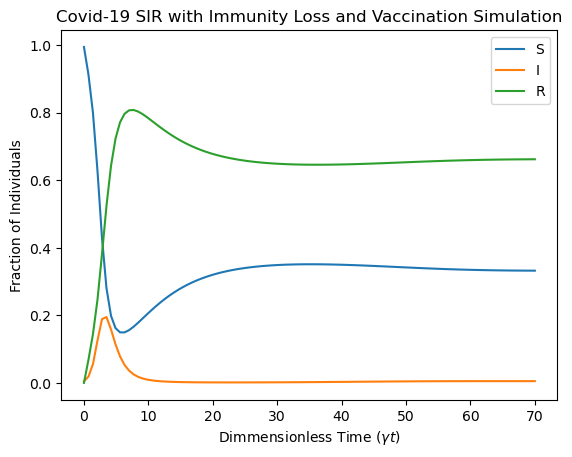

In [886]:
N = 200

beta = 0.3 #Beta times pop#
gamma = 0.1
lam = 1/183
nu = 0.00933

NS0 = 199
NI0 = 1
NR0 = 0

T = 700

time_points = np.linspace(0,T,101)
x0 = [NS0,NI0,NR0]
sol = intgr.odeint(dImVacdt, x0, time_points)

plt.plot(time_points*gamma, sol[:,0]/N, label = 'S')
plt.plot(time_points*gamma, sol[:,1]/N, label = 'I')
plt.plot(time_points*gamma, sol[:,2]/N, label = 'R')
plt.ylabel('Fraction of Individuals')
plt.xlabel('Dimmensionless Time ($\gamma{t}$)')
plt.title('Covid-19 SIR with Immunity Loss and Vaccination Simulation')
plt.legend()
plt.savefig('Covid19_VaccImmun_Sim')
plt.show()

In [870]:
nu_list = np.linspace(1/280,1/10,1000)
infected_list = []

for nu in nu_list:
    time_points = np.linspace(0,T,101)
    x0 = [NS0,NI0,NR0]
    sol = intgr.odeint(dImVacdt, x0, time_points)
    infected_list.append(sol[100,1])

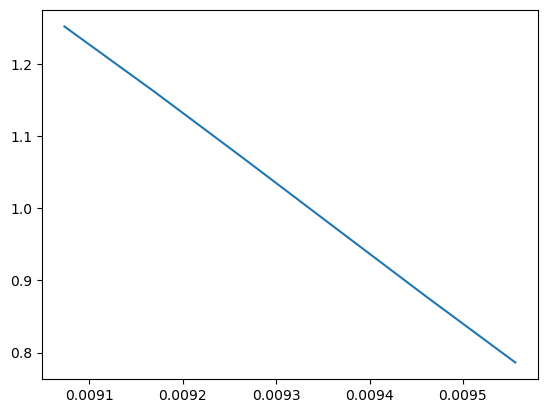

1.0679166479113136
0.009266409266409266


In [871]:
plt.plot(nu_list[57:63],infected_list[57:63])
plt.show()

print(infected_list[59])
print(nu_list[59])

In [880]:
nu_list1 = np.linspace(0.0092,0.0094,100)
infected_list1 = []

for nu in nu_list1:
    time_points = np.linspace(0,T,101)
    x0 = [NS0,NI0,NR0]
    sol = intgr.odeint(dImVacdt, x0, time_points)
    infected_list1.append(sol[100,1])

print(infected_list1[68])
print(nu_list1[68])

0.9983483614912246
0.009337373737373738
